y = 10 * math.sin(5 * x) + 7 * math.cos(4 * x)


<IPython.core.display.Javascript object>


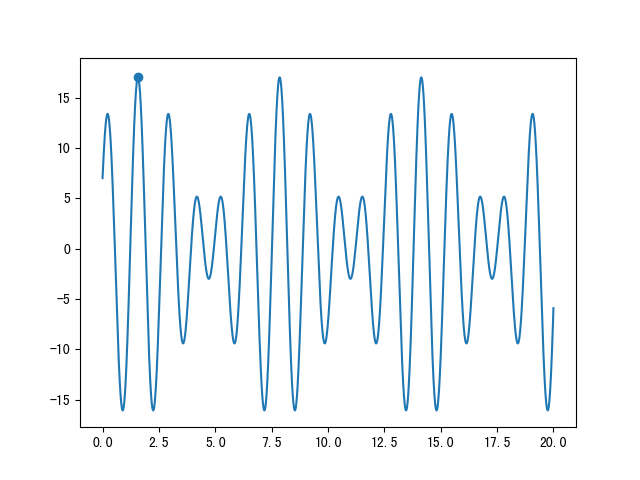

y = 16.998364, x = 1.573803


In [36]:
# 0.0 coding:utf-8 0.0

import matplotlib.pyplot as plt
import math

from calobjValue import calobjValue
from calfitValue import calfitValue
from selection import selection
from crossover import crossover
from mutation import mutation
from best import best
from geneEncoding import geneEncoding

print ('y = 10 * math.sin(5 * x) + 7 * math.cos(4 * x)')
x = np.arange(0,20,0.001)
y = 10 * np.sin(5 * x) + 7 * np.cos(4 * x)
plt.plot(x, y)

# 计算2进制序列代表的数值
def b2d(b, max_value, chrom_length):
    t = 0
    for j in range(len(b)):
        t += b[j] * (math.pow(2, j))
    t = t * max_value / (math.pow(2, chrom_length) - 1)
    return t

pop_size = 500# 种群数量
max_value = 10      # 基因中允许出现的最大值
chrom_length = 10# 染色体长度
pc = 0.6    # 交配概率
pm = 0.015           # 变异概率
results = [[]]# 存储每一代的最优解，N个二元组
fit_value = []# 个体适应度
fit_mean = []# 平均适应度

# pop = [[0, 1, 0, 1, 0, 1, 0, 1, 0, 1] for i in range(pop_size)]
pop = geneEncoding(pop_size, chrom_length)

for i in range(pop_size):
    obj_value = calobjValue(pop, chrom_length, max_value)        # 个体评价
    fit_value = calfitValue(obj_value)      # 淘汰
    best_individual, best_fit = best(pop, fit_value)# 第一个存储最优的解, 第二个存储最优基因
    results.append([best_fit, b2d(best_individual, max_value, chrom_length)])
    selection(pop, fit_value)# 新种群复制
    crossover(pop, pc)# 交配
    mutation(pop, pm)       # 变异

results = results[1:]
results.sort()
#print(results[-1])
#print(best_individual)
#print(best_fit)
#print(obj_value[1])


#print (results)
print ("y = %f, x = %f" % (results[-1][0], results[-1][1]))
plt.scatter(results[-1][1], results[-1][0])

#X = []
#Y = []
#for i in range(500):
#    X.append(i)
#    t = results[i][0]
#    Y.append(t)

#plt.plot(X, Y)

plt.show()

<IPython.core.display.Javascript object>


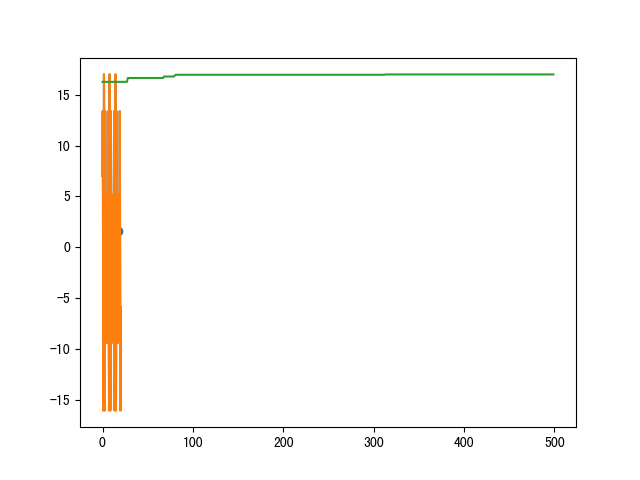

<IPython.core.display.Javascript object>


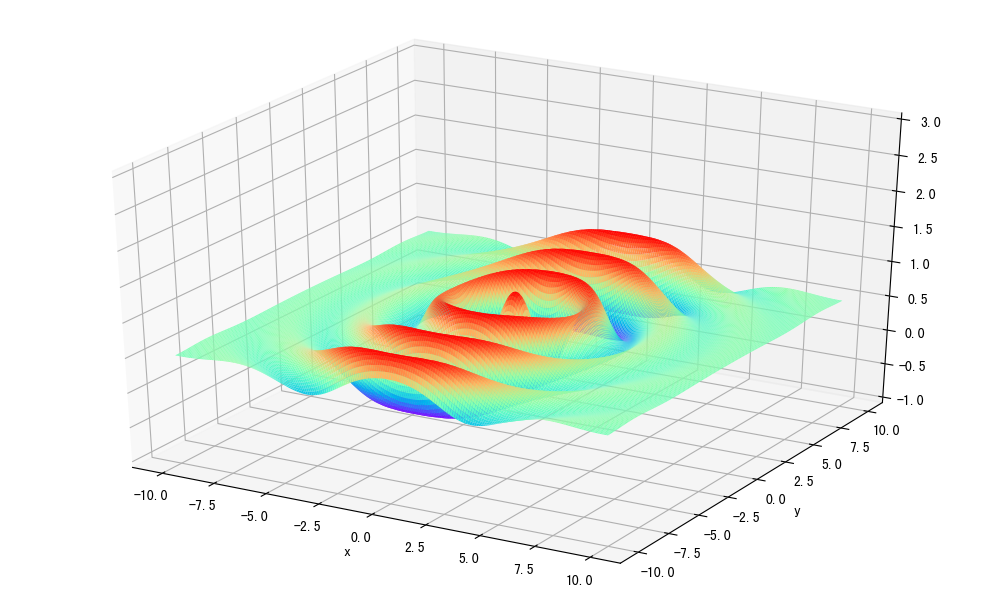

In [10]:

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10,6))
ax = Axes3D(fig)
x = np.arange(-10, 10, 0.1)
y = np.arange(-10, 10, 0.1)
X, Y = np.meshgrid(x, y)       
Z = 0.5 - (np.sin(np.sqrt(X**2+Y**2))**2 - 0.5)/(1 + 0.001*(x**2 + y**2)**2)
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlim([-1,3])
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
plt.show()

In [15]:
def geneincode(c):
    return -10 + c*(20/(2**25 - 1))

In [18]:
geneincode(1100010100100100001000000)

6.556571321981887e+17

In [19]:
import math, random

class Population:
    # 种群的设计
    def __init__(self, size, chrom_size, cp, mp, gen_max):
        # 种群信息合
        self.individuals = []          # 个体集合
        self.fitness = []              # 个体适应度集
        self.selector_probability = [] # 个体选择概率集合
        self.new_individuals = []      # 新一代个体集合

        self.elitist = {'chromosome':[0, 0], 'fitness':0, 'age':0} # 最佳个体的信息

        self.size = size # 种群所包含的个体数
        self.chromosome_size = chrom_size # 个体的染色体长度
        self.crossover_probability = cp   # 个体之间的交叉概率
        self.mutation_probability = mp    # 个体之间的变异概率
         
        self.generation_max = gen_max # 种群进化的最大世代数
        self.age = 0                  # 种群当前所处世代
          
        # 随机产生初始个体集，并将新一代个体、适应度、选择概率等集合以 0 值进行初始化
        v = 2 ** self.chromosome_size - 1
        for i in range(self.size):
            self.individuals.append([random.randint(0, v), random.randint(0, v)])
            self.new_individuals.append([0, 0])
            self.fitness.append(0)
            self.selector_probability.append(0)

    # 基于轮盘赌博机的选择
    def decode(self, interval, chromosome):
        '''将一个染色体 chromosome 映射为区间 interval 之内的数值'''
        d = interval[1] - interval[0]
        n = float (2 ** self.chromosome_size -1)
        return (interval[0] + chromosome * d / n)
     
    def fitness_func(self, chrom1, chrom2):
        '''适应度函数，可以根据个体的两个染色体计算出该个体的适应度'''
        interval = [-10.0, 10.0]
        (x, y) = (self.decode(interval, chrom1), 
                  self.decode(interval, chrom2))
        n = lambda x, y: math.sin(math.sqrt(x*x + y*y)) ** 2 - 0.5
        d = lambda x, y: (1 + 0.001 * (x*x + y*y)) ** 2
        func = lambda x, y: 0.5 - n(x, y)/d(x, y)
        return func(x, y)
         
    def evaluate(self):
        '''用于评估种群中的个体集合 self.individuals 中各个个体的适应度'''
        sp = self.selector_probability
        for i in range (self.size):
            self.fitness[i] = self.fitness_func (self.individuals[i][0],   # 将计算结果保存在 self.fitness 列表中
                                                 self.individuals[i][1])
        ft_sum = sum (self.fitness)
        for i in range (self.size):
            sp[i] = self.fitness[i] / float (ft_sum)   # 得到各个个体的生存概率
        for i in range (1, self.size):
            sp[i] = sp[i] + sp[i-1]   # 需要将个体的生存概率进行叠加，从而计算出各个个体的选择概率

    # 轮盘赌博机（选择）
    def select(self):
        (t, i) = (random.random(), 0)
        for p in self.selector_probability:
            if p > t:
                break
            i = i + 1
        return i

    # 交叉
    def cross(self, chrom1, chrom2):
        p = random.random()    # 随机概率
        n = 2 ** self.chromosome_size -1
        if chrom1 != chrom2 and p < self.crossover_probability:
            t = random.randint(1, self.chromosome_size - 1)   # 随机选择一点（单点交叉）
            mask = n << t    # << 左移运算符
            (r1, r2) = (chrom1 & mask, chrom2 & mask)   # & 按位与运算符：参与运算的两个值,如果两个相应位都为1,则该位的结果为1,否则为0
            mask = n >> (self.chromosome_size - t)
            (l1, l2) = (chrom1 & mask, chrom2 & mask)
            (chrom1, chrom2) = (r1 + l2, r2 + l1)
        return (chrom1, chrom2)

    # 变异
    def mutate(self, chrom):
        p = random.random ()
        if p < self.mutation_probability:
            t = random.randint (1, self.chromosome_size)
            mask1 = 1 << (t - 1)
            mask2 = chrom & mask1
            if mask2 > 0:
                chrom = chrom & (~mask2)  # ~ 按位取反运算符：对数据的每个二进制位取反,即把1变为0,把0变为1 
            else:
                chrom = chrom ^ mask1   # ^ 按位异或运算符：当两对应的二进位相异时，结果为1 
        return chrom

    # 保留最佳个体
    def reproduct_elitist (self):
        # 与当前种群进行适应度比较，更新最佳个体
        j = -1
        for i in range (self.size):
            if self.elitist['fitness'] < self.fitness[i]:
                j = i
                self.elitist['fitness'] = self.fitness[i]
        if (j >= 0):
            self.elitist['chromosome'][0] = self.individuals[j][0]
            self.elitist['chromosome'][1] = self.individuals[j][1]
            self.elitist['age'] = self.age

    # 进化过程
    def evolve(self):
        indvs = self.individuals
        new_indvs = self.new_individuals
        # 计算适应度及选择概率
        self.evaluate()
        # 进化操作
        i = 0
        while True:
            # 选择两个个体，进行交叉与变异，产生新的种群
            idv1 = self.select()
            idv2 = self.select()
            # 交叉
            (idv1_x, idv1_y) = (indvs[idv1][0], indvs[idv1][1])
            (idv2_x, idv2_y) = (indvs[idv2][0], indvs[idv2][1])
            (idv1_x, idv2_x) = self.cross(idv1_x, idv2_x)
            (idv1_y, idv2_y) = self.cross(idv1_y, idv2_y)
            # 变异
            (idv1_x, idv1_y) = (self.mutate(idv1_x), self.mutate(idv1_y))
            (idv2_x, idv2_y) = (self.mutate(idv2_x), self.mutate(idv2_y))
            (new_indvs[i][0], new_indvs[i][1]) = (idv1_x, idv1_y)  # 将计算结果保存于新的个体集合self.new_individuals中
            (new_indvs[i+1][0], new_indvs[i+1][1]) = (idv2_x, idv2_y)
            # 判断进化过程是否结束
            i = i + 2         # 循环self.size/2次，每次从self.individuals 中选出2个
            if i >= self.size:
                break
        
        # 最佳个体保留
        # 如果在选择之前保留当前最佳个体，最终能收敛到全局最优解。
        self.reproduct_elitist()

        # 更新换代：用种群进化生成的新个体集合 self.new_individuals 替换当前个体集合
        for i in range (self.size):
            self.individuals[i][0] = self.new_individuals[i][0]
            self.individuals[i][1] = self.new_individuals[i][1]

    def run(self):
        '''根据种群最大进化世代数设定了一个循环。
        在循环过程中，调用 evolve 函数进行种群进化计算，并输出种群的每一代的个体适应度最大值、平均值和最小值。'''
        for i in range (self.generation_max):
            self.evolve ()
            print (i, max (self.fitness), sum (self.fitness)/self.size, min (self.fitness))
if __name__ == '__main__':
    # 种群的个体数量为 50，染色体长度为 25，交叉概率为 0.8，变异概率为 0.1,进化最大世代数为 150
    pop = Population (50, 24, 0.8, 0.1, 150)
    pop.run()

0 0.9714090234346393 0.5364300473383723 0.02159572396155074
1 0.9878386162181447 0.6972309256952579 0.10725956839277778
2 0.9878463801528858 0.7609743804332645 0.08081887424207546
3 0.9902725869159307 0.7628366218210241 0.06304185704343274
4 0.990272593912214 0.7877991228311484 0.02299321662752768
5 0.9672048330071339 0.7324488133911065 0.10955955919439081
6 0.967157505280178 0.7598022807672232 0.10743738266593578
7 0.967148096247753 0.7878733073893446 0.11706561695325152
8 0.9844350575933505 0.7880371040237399 0.0028519398911749927
9 0.9807284792536155 0.8200291343247607 0.0640215536975654
10 0.9798443444826945 0.794550338594978 0.10234858141481773
11 0.9768258708691886 0.8618157406333082 0.2914639717544306
12 0.979072121682441 0.8838445567617067 0.351874212218125
13 0.9790836785526402 0.8642793656703701 0.11615169887358329
14 0.9790745947648539 0.8937216707841981 0.321922270279085
15 0.9790766684288301 0.8426034400908763 0.11713786634915013
16 0.9759648905716711 0.8371080923658168 0.

In [1363]:
np.random.randn((3,2))

TypeError: 'tuple' object cannot be interpreted as an integer

In [1370]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def Rule(x):
    index = (x<=0)
    x[index]=0
    return x
def Rule_d(x):
    index = (x<=0)
    x = np.ones_like(x)
    x[index]=0
    return x

def cost_mean2(y, y_hat):
        return 0.5 * (y - y_hat)**2
class NN:
    
    
    def __init__(self, dimension_input, hidden_structure, dimension_output):
        self.learning_rate = 0.01
        self.epoch = 200
        self.inp = dimension_input
        self.hidden_layers = hidden_structure
        self.weights = {}
        self.bias = {}
        self.outp = dimension_output
        self.cost = []
        self.erro = {}
        self.layer_outs = {}
        self.layer_z = {}
        
         
    def initialize(self):
        self.weights.update({'W_0': np.random.randn(self.hidden_layers[0], self.inp)})
        self.bias.update({'B_0': np.random.randn(self.hidden_layers[0], 1)})
        
        self.weights.update({'W_'+str(len(self.hidden_layers)): np.random.randn(self.outp, self.hidden_layers[-1])})
        self.bias.update({'B_'+str(len(self.hidden_layers)): np.ones((self.outp,1))})
        for i in range(1, len(self.hidden_layers)):
            self.weights.update({'W_'+str(i): np.random.randn(self.hidden_layers[i], self.hidden_layers[i-1])})
            self.bias.update({'B_'+str(i): np.random.randn(self.hidden_layers[i],1)})
    
    
    def propagation(self, X, Y):
        train_X = np.array(list(X)).reshape(self.inp,1)
        train_Y = np.array(Y).reshape(self.outp,1)
        assert train_X.shape == (self.inp, 1)
        assert train_Y.shape == (self.outp, 1)
        
        self.layer_outs.update({'n_0':train_X})
        
        for i in range(0, len(self.hidden_layers)+1):
            z = np.dot(self.weights['W_'+str(i)], self.layer_outs['n_'+str(i)]) + self.bias['B_'+str(i)]
            
            n = sigmoid(z)
            #n = Rule(z)#active function
            
            self.layer_outs.update({'n_'+str(i+1): n})
            self.layer_z.update({'n_'+str(i+1): z})
        
        
        
        output_key = list(self.layer_outs.keys())[-1]
        cost = cost_mean2(self.layer_outs[output_key], train_Y)
        
        # erro
        d_activeF = sigmoid(self.layer_z['n_'+str(len(self.hidden_layers)+1)])*(1-sigmoid(self.layer_z['n_'+str(len(self.hidden_layers)+1)]))
        d_activeF = d_activeF * np.eye(len(d_activeF))
        #d_activeF = Rule_d(self.layer_z['n_'+str(len(self.hidden_layers)+1)])
        #d_activeF = d_activeF * np.eye(len(d_activeF))
        d_costF = self.layer_outs[output_key] - train_Y
        erro = np.dot(d_activeF, d_costF)
        
        self.erro.update({'E_'+str(len(self.hidden_layers)+1): erro }) 
        self.cost = cost 
        
    def back_propagation(self):
        for i in range(len(self.hidden_layers), 0, -1):
            d_activeF = sigmoid(self.layer_z['n_'+str(i)])*(1-sigmoid(self.layer_z['n_'+str(i)]))
            d_activeF = d_activeF * np.eye(len(d_activeF)) 
            #d_activeF = Rule_d(self.layer_z['n_'+str(i)])
            #d_activeF = d_activeF * np.eye(len(d_activeF))
            d_linear = self.weights['W_'+str(i)].T
            erro = np.dot(d_activeF, np.dot(d_linear, self.erro['E_'+str(i+1)]))
            self.erro.update({'E_'+str(i):erro})
    
    def update_params(self, accum_erro):
        for i in range(len(self.hidden_layers)+1, 0, -1):
            delta_W = np.dot(accum_erro['E_'+str(i)], self.layer_outs['n_'+str(i-1)].T)
            delta_w = self.learning_rate * (delta_W + self.weights['W_'+str(i-1)])
            #delta_w = self.learning_rate * delta_W
            
            delta_B = self.learning_rate * accum_erro['E_'+str(i)]
            self.weights['W_'+str(i-1)] -= delta_W
            self.bias['B_'+str(i-1)] -= delta_B
            
    def fit(self, train_X, train_Y, test_X, test_Y, learning_rate, epoch_num, batch_rate = 1, erro = 1e-5):
        self.learning_rate = learning_rate
        self.epoch_num = epoch_num
        epoch = 0
        
        cost = []
        while (epoch < epoch_num):
            accum_cost = 0
            accum_erro = {}
            i = np.random.choice(len(train_Y),1)[0]
            self.propagation(train_X[i], train_Y[i])
            self.back_propagation()
            self.update_params(self.erro)
            cost.append(self.cost)
            epoch += 1
            #if epoch%5000 == 0:
            #    print(epoch, end=',')
            #    acc = self.acc(test_X, test_Y)
            #    print('epoch:{},  acc:{}'.format(epoch, acc))
        return cost
        
    def predict(self, test_X):
        train_X = np.array(list(test_X)).reshape(self.inp,1)
        assert train_X.shape == (self.inp, 1)
        layer_outs = {}
        layer_outs.update({'n_0':train_X})
        
        for i in range(0, len(self.hidden_layers)+1):
            z = np.dot(self.weights['W_'+str(i)], layer_outs['n_'+str(i)]) + self.bias['B_'+str(i)]
            n = sigmoid(z)   #active function
            layer_outs.update({'n_'+str(i+1): n})
        result = n.reshape(len(n,))
        result = np.argwhere(result == result.max())[0][0]
        return result
    
    def acc(self, test_X, test_Y):
        T_count = 0
        for x,y in zip(test_X,test_Y):
            predic = self.predict(x)
            if y.shape==():
                actral_label = y
            else:
                actral_label = np.where(np.array(y) == 1)[0][0]
            if predic == actral_label:
                T_count += 1
        return T_count/len(test_X)

CPU times: user 12.7 s, sys: 6.29 ms, total: 12.7 s
Wall time: 12.7 s


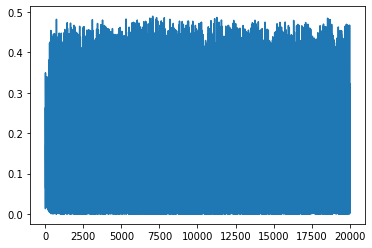

In [1456]:
%%time
model = NN(21,[64,84,30,8],1)
model.initialize()
cost = model.fit(train_X,train_Y,test_X, test_Y, 0.08,20000, batch_rate=0.3)
plt.plot(range(len([i[0][0] for i in cost])),[i[0][0] for i in cost])

acc=1.0


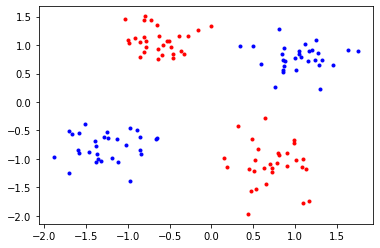

In [847]:
%matplotlib inline
#colors = plt.cm.RdPu(np.linspace(0.3, 1, model.outp))
colors = ['r', 'b']
predic = []
T_label = []
count = 0
for x,y in zip(test_X,test_Y):
    predic.append(model.predict(x))
    T_label.append(np.where(np.array(y) == 1)[0][0])
for p, pred,label in zip(test_X, predic, T_label):
    plt.plot(p[0],p[1], color=colors[pred],  marker ='.')
    #plt.plot(p[0],p[1], color=colors[label],  marker ='x')
    if pred == label:
        count += 1
print('acc={}'.format(count/len(predic)))

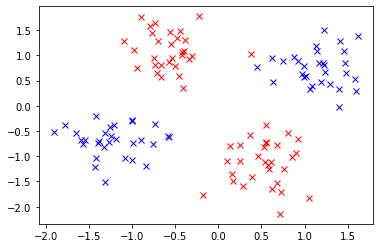

In [833]:
for p, pred,label in zip(test_X, predic, T_label):
    #plt.plot(p[0],p[1], color=colors[pred],  marker ='.', label=pred)
    plt.plot(p[0],p[1], color=colors[label],  marker ='x')

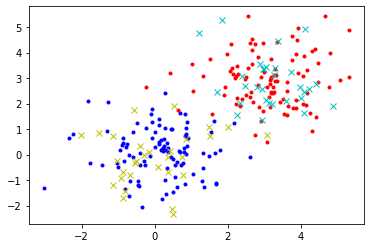

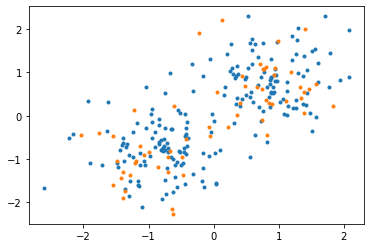

In [625]:
points1 = []
points2 = []
points_test1 = []
points_test2 = []
for i in range(100):
    points1.append([np.random.randn(), np.random.randn(), [1,0]])
    points2.append([np.random.randn()+3, np.random.randn()+3, [0,1]])

plt.plot(np.array(points1)[:,0],np.array(points1)[:,1], 'b.')
plt.plot(np.array(points2)[:,0],np.array(points2)[:,1], 'r.')
points1.extend(points2)
np.random.shuffle(points1)
train_X = np.array(points1)[:,:2]
train_Y = np.array(points1)[:,2]
miu = [train_X[:,0].mean(), train_X[:,1].mean()]
std = [train_X[:,0].std(), train_X[:,1].std()]

for i in range(30):
    points_test1.append([np.random.randn(), np.random.randn(), [1,0]])
    points_test2.append([np.random.randn()+3, np.random.randn()+3, [0,1]])
plt.plot(np.array(points_test1)[:,0],np.array(points_test1)[:,1], 'yx')
plt.plot(np.array(points_test2)[:,0],np.array(points_test2)[:,1], 'cx')
points_test1.extend(points_test2)
np.random.shuffle(points_test1)
test_X = np.array(points_test1)[:,:2]
test_Y = np.array(points_test1)[:,2]

train_X[:,0] = (train_X[:,0] - miu[0])/std[0]
train_X[:,1] = (train_X[:,1] - miu[1])/std[1]
test_X[:,0] = (test_X[:,0] - miu[0])/std[0]
test_X[:,1] = (test_X[:,1] - miu[1])/std[1]
plt.show()
plt.plot(train_X[:,0], train_X[:,1],'.')
plt.plot(test_X[:,0], test_X[:,1],'.')

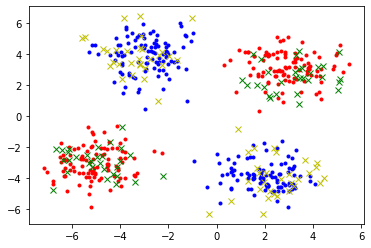

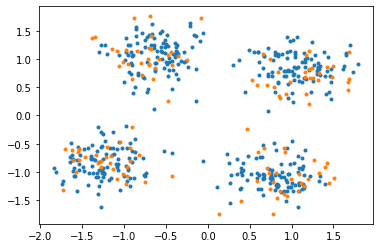

In [1108]:
points1 = []
points2 = []
points3 = []
points4 = []
points_test1 = []
points_test2 = []
points_test3 = []
points_test4 = []
for i in range(100):
    points1.append([np.random.randn()+2, np.random.randn()-4, [1,0]])
    points2.append([np.random.randn()+3, np.random.randn()+3, [0,1]])
    points3.append([np.random.randn()-3, np.random.randn()+4, [1,0]])
    points4.append([np.random.randn()-5, np.random.randn()-3, [0,1]])

plt.plot(np.array(points1)[:,0],np.array(points1)[:,1], 'b.')
plt.plot(np.array(points2)[:,0],np.array(points2)[:,1], 'r.')
plt.plot(np.array(points3)[:,0],np.array(points3)[:,1], 'b.')
plt.plot(np.array(points4)[:,0],np.array(points4)[:,1], 'r.')
points1.extend(points2)
points1.extend(points3)
points1.extend(points4)
np.random.shuffle(points1)
train_X = np.array(points1)[:,:2]
train_Y = np.array(points1)[:,2]
miu = [train_X[:,0].mean(), train_X[:,1].mean()]
std = [train_X[:,0].std(), train_X[:,1].std()]

for i in range(30):
    points_test1.append([np.random.randn()+2, np.random.randn()-4, [1,0]])
    points_test2.append([np.random.randn()+3, np.random.randn()+3, [0,1]])
    points_test3.append([np.random.randn()-3, np.random.randn()+4, [1,0]])
    points_test4.append([np.random.randn()-5, np.random.randn()-3, [0,1]])
plt.plot(np.array(points_test1)[:,0],np.array(points_test1)[:,1], 'yx')
plt.plot(np.array(points_test2)[:,0],np.array(points_test2)[:,1], 'gx')
plt.plot(np.array(points_test3)[:,0],np.array(points_test3)[:,1], 'yx')
plt.plot(np.array(points_test4)[:,0],np.array(points_test4)[:,1], 'gx')
points_test1.extend(points_test2)
points_test1.extend(points_test3)
points_test1.extend(points_test4)
np.random.shuffle(points_test1)
test_X = np.array(points_test1)[:,:2]
test_Y = np.array(points_test1)[:,2]

train_X[:,0] = (train_X[:,0] - miu[0])/std[0]
train_X[:,1] = (train_X[:,1] - miu[1])/std[1]
test_X[:,0] = (test_X[:,0] - miu[0])/std[0]
test_X[:,1] = (test_X[:,1] - miu[1])/std[1]
plt.show()
plt.plot(train_X[:,0], train_X[:,1],'.')
plt.plot(test_X[:,0], test_X[:,1],'.')

In [973]:
import pandas as pd
data_train = pd.read_csv('/media/haol/新加卷/kaggle/titanic/upgraded_train.csv')
data_test = pd.read_csv('/media/haol/新加卷/kaggle/titanic/upgraded_validation.csv')

In [1111]:
train_X.shape

(400, 2)

In [1045]:
data_train.loc[(data_train.Fare>0)&(data_train.Survived==1)].count()
#data_train.loc[(data_train.Fare>0)].count()

PassengerId      341
Survived         341
Age              341
Fare             341
Pclass_1         341
Pclass_2         341
Pclass_3         341
Sex_female       341
Sex_male         341
Embarked_C       341
Embarked_Q       341
Embarked_S       341
HasCabin         341
FamilySize       341
IsAlone          341
Title_Master     341
Title_Miss       341
Title_Mr         341
Title_Mrs        341
Title_Special    341
Fare_code        341
dtype: int64

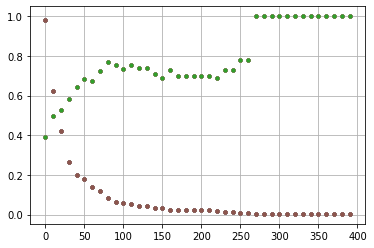

In [1079]:
sur_rate = []
total = []
for i in range(0,400,10):
    sur = data_train.loc[(data_train.Fare>i)&(data_train.Survived==1)].count()
    tot = data_train.loc[(data_train.Fare>i)].count()
    total.append(tot)
    sur_rate.append(sur/tot)
plt.grid()
plt.plot(range(0,400,10), sur_rate,'.')
plt.plot(range(0,400,10), np.array(total)/len(data_train),'.')
plt.show()


sur_rate = []
total = []
for i in range(0,90,10):
    sur = data_train.loc[(data_train.Fare>i)&(data_train.Survived==1)].count()
    tot = data_train.loc[(data_train.Fare>i)].count()
    total.append(tot)
    sur_rate.append(sur/tot)
plt.grid()
plt.plot(range(0,90,10), sur_rate,'.')
plt.plot(range(0,90,10), np.array(total)/len(data_train),'.')
plt.show()

In [1054]:
data_train.loc[data_train.Fare<=75, 'Fare_code0']=1
data_train.loc[data_train.Fare>75, 'Fare_code0']=0

data_train.loc[(data_train.Fare>75)&(data_train.Fare<=250), 'Fare_code1']=1
data_train.loc[data_train.Fare<=75, 'Fare_code1']=0
data_train.loc[data_train.Fare>250, 'Fare_code1']=0

data_train.loc[data_train.Fare>250, 'Fare_code2']=1
data_train.loc[data_train.Fare<=250, 'Fare_code2']=0


data_test.loc[data_test.Fare<=75, 'Fare_code0']=1
data_test.loc[data_test.Fare>75, 'Fare_code0']=0

data_test.loc[(data_test.Fare>75)&(data_train.Fare<=250), 'Fare_code1']=1
data_test.loc[data_test.Fare<=75, 'Fare_code1']=0
data_test.loc[data_test.Fare>250, 'Fare_code1']=0

data_test.loc[data_test.Fare>250, 'Fare_code2']=1
data_test.loc[data_test.Fare<=250, 'Fare_code2']=0

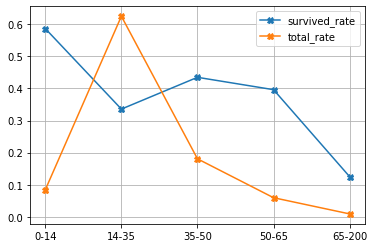

In [1098]:
total = []
sur_rate = []
age_range = [0,14,35,50,65,200]
for i in range(len(age_range)-1):
    tot = data_train.loc[(age_range[i]<data_train.Age)&(data_train.Age<age_range[i+1]),'Fare'].count()
    sur = data_train.loc[(data_train.Survived==1)&(age_range[i]<data_train.Age)&(data_train.Age<age_range[i+1]),'Fare'].count()
    total.append(tot)
    sur_rate.append(sur/tot)
plt.grid()
plt.plot(range(len(age_range)-1), sur_rate,'-X',label='survived_rate')
plt.plot(range(len(age_range)-1), np.array(total)/len(data_train),'-X', label='total_rate')
plt.xticks(range(len(age_range)-1),["{}-{}".format(age_range[i], age_range[i+1]) for i in range(len(age_range)-1)])
plt.legend()
plt.show()

In [1104]:
data_train.Tenagers=[0]*len(data_train)
data_train.olds=[0]*len(data_train)
data_train.loc[data_train.Age<=14,'Tenagers']=1
data_train.loc[data_train.Age>=65,'olds']=1

data_test.Tenagers=[0]*len(data_test)
data_test.olds=[0]*len(data_test)
data_test.loc[data_test.Age<=14,'Tenagers']=1
data_test.loc[data_test.Age>=65,'olds']=1

In [1129]:
data_train.FamilySize = data_train.FamilySize / data_train.FamilySize.max()
data_test.FamilySize = data_test.FamilySize / data_test.FamilySize.max()

In [1141]:
data_train=data_train.drop(columns=['PassengerId', 'Age', 'Fare'])
data_test=data_test.drop(columns=['PassengerId', 'Age', 'Fare'])

In [1144]:
data_train.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,HasCabin,...,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Special,Fare_code0,Fare_code1,Fare_code2,Tenagers,olds
0,0,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,1.0,0.0,0.0,0,0
1,1,1,0,0,1,0,1,0,0,1,...,0,0,0,1,0,1.0,0.0,0.0,0,0
2,1,0,0,1,1,0,0,0,1,0,...,0,1,0,0,0,1.0,0.0,0.0,0,0
3,1,1,0,0,1,0,0,0,1,1,...,0,0,0,1,0,1.0,0.0,0.0,0,0
4,0,0,0,1,0,1,0,0,1,0,...,0,0,1,0,0,1.0,0.0,0.0,0,0


In [1166]:
index = np.random.rand(len(data_train))
len([i for i in index if i<0.8])/len(index)

0.8058361391694725

In [1167]:
train_X = np.array(data_train.iloc[:,1:][index<=0.8])
train_Y = np.array(data_train.iloc[:,0][index<=0.8])

test_X = np.array(data_train.iloc[:,1:][index>0.8])
test_Y = np.array(data_train.iloc[:,0][index>0.8])

In [1169]:
print(train_X.shape, test_X.shape)
print(train_Y.shape, test_Y.shape)

(718, 21) (173, 21)
(718,) (173,)


In [879]:
import torch

In [880]:
# numpy random
print("Numpy {}\n".format(np.random.rand(2,3)))

# pytorch random
print(torch.rand(2,3))

Numpy [[0.81300516 0.09877718 0.3146152 ]
 [0.14560424 0.3122825  0.63556053]]

tensor([[0.7659, 0.0357, 0.7519],
        [0.5922, 0.6926, 0.1730]])


In [881]:
# create tensor 
tensor = torch.ones(3,3)
print("\n",tensor)

# Resize
print("{}{}\n".format(tensor.view(9).shape,tensor.view(9)))

# Addition
print("Addition: {}\n".format(torch.add(tensor,tensor)))

# Subtraction
print("Subtraction: {}\n".format(tensor.sub(tensor)))

# Element wise multiplication
print("Element wise multiplication: {}\n".format(torch.mul(tensor,tensor)))

# Element wise division
print("Element wise division: {}\n".format(torch.div(tensor,tensor)))

# Mean
tensor = torch.Tensor([1,2,3,4,5])
print("Mean: {}".format(tensor.mean()))

# Standart deviation (std)
print("std: {}".format(tensor.std()))


 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([9])tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Addition: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

Subtraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Element wise multiplication: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Element wise division: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Mean: 3.0
std: 1.5811388492584229


In [882]:
from torch.autograd import Variable

In [927]:
# lets make basic backward propagation
# we have an equation that is y = x^2
array = [2,4]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad = True)
y = x**2
print(" y =  ",y)

# recap o equation o = 1/2*sum(y)
o = torch.log((1/2)*torch.mean(x)**2)
print(" o =  ",o)

# backward
o.backward(retain_graph=False) # calculates gradients

# As I defined, variables accumulates gradients. In this part there is only one variable x.
# Therefore variable x should be have gradients
# Lets look at gradients with x.grad
print("gradients: ",x.grad)

 y =   tensor([ 4., 16.], grad_fn=<PowBackward0>)
 o =   tensor(1.5041, grad_fn=<LogBackward>)
gradients:  tensor([0.3333, 0.3333])


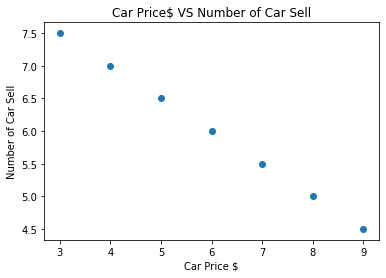

In [931]:
# As a car company we collect this data from previous selling
# lets define car prices
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

# lets define number of car sell
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

# lets visualize our data
import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

epoch 0, loss 22.88212013244629
epoch 50, loss 5.264405727386475
epoch 100, loss 3.557380199432373
epoch 150, loss 2.4038705825805664
epoch 200, loss 1.6243958473205566
epoch 250, loss 1.0976731777191162
epoch 300, loss 0.7417431473731995
epoch 350, loss 0.5012274384498596
epoch 400, loss 0.33869993686676025
epoch 450, loss 0.22887389361858368
epoch 500, loss 0.1546594351530075
epoch 550, loss 0.10450997203588486
epoch 600, loss 0.0706215351819992
epoch 650, loss 0.04772137850522995
epoch 700, loss 0.032247550785541534
epoch 750, loss 0.02179086208343506
epoch 800, loss 0.014725062064826488
epoch 850, loss 0.00995049811899662
epoch 900, loss 0.00672398554161191
epoch 950, loss 0.004543545190244913
epoch 1000, loss 0.003070347709581256


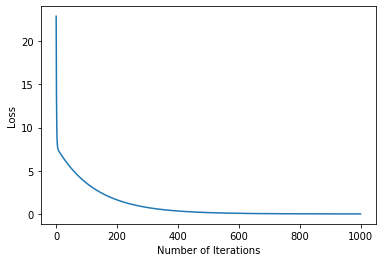

In [932]:
import torch.nn as nn 
import warnings



class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        super(LinearRegression,self).__init__()
        self.linear = nn.Linear(input_dim,output_dim)
    def forward(self,x):
        return self.linear(x)
    
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim,output_dim) # input and output size are 1

mse = nn.MSELoss()
learning_rate = 0.02   # how fast we reach best parameters
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
    optimizer.zero_grad() 
    results = model(car_price_tensor)
    loss = mse(results, number_of_car_sell_tensor)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.data)
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()


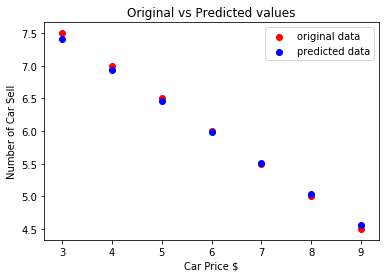

In [933]:
# predict our car price 
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array,number_of_car_sell_array,label = "original data",color ="red")
plt.scatter(car_prices_array,predicted,label = "predicted data",color ="blue")

# predict if car price is 10$, what will be the number of car sell
#predicted_10 = model(torch.from_numpy(np.array([10]))).data.numpy()
#plt.scatter(10,predicted_10.data,label = "car price 10$",color ="green")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()

In [1398]:
import torch
import torch.nn as nn
torch.__version__
import torch.optim

import torch.nn.functional as F

In [1469]:
x = torch.from_numpy(train_X[:3,:])
y = torch.from_numpy(train_Y[:3])

In [1472]:
x

tensor([[0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000,
         0.1818, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000,
         0.1818, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000,
         0.0909, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000,
         0.0000, 0.0000, 0.0000]], dtype=torch.float64)

In [1465]:
linear = nn.Linear(21,16)
print('w', linear.weight)

w Parameter containing:
tensor([[-0.1321, -0.0263,  0.0028, -0.0437,  0.0034,  0.0941, -0.0389, -0.1512,
         -0.1608, -0.1454, -0.0725, -0.2097, -0.1774,  0.1303,  0.1821,  0.0263,
          0.0142,  0.0656,  0.0778,  0.0321,  0.1115],
        [ 0.2118,  0.1125, -0.1732,  0.2005, -0.0897, -0.0406,  0.0067, -0.0394,
         -0.0319, -0.0219,  0.1873,  0.1256, -0.1078, -0.0947,  0.1044,  0.2105,
          0.1743,  0.0380,  0.1120,  0.0928, -0.1434],
        [-0.1570, -0.2032,  0.1114, -0.0109, -0.2120, -0.0883, -0.0117,  0.1202,
         -0.1010,  0.0108, -0.0192, -0.1062, -0.1083,  0.1388,  0.0347,  0.1572,
         -0.1566,  0.1104,  0.0600,  0.0215, -0.1366],
        [ 0.0173,  0.0388,  0.2022,  0.0484,  0.1866, -0.1073, -0.1303, -0.1716,
         -0.1519,  0.1617, -0.0859,  0.2166,  0.0179, -0.1307,  0.0305,  0.0826,
          0.0623, -0.0091,  0.1885,  0.0024,  0.1130],
        [-0.1554,  0.0368,  0.0461, -0.1851, -0.0254, -0.1568, -0.1155,  0.1994,
         -0.0883, -0.1260, 

In [1466]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)
pred = linear(x)
loss = criterion(pred, y)
print('loss: ', loss.item())

RuntimeError: Expected object of scalar type Double but got scalar type Float for argument #2 'mat2'